# Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [40]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.neural_network import MLPRegressor

import matplotlib.pyplot as plt



import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [9]:
# load the final dataset from  previous lab
customer_df_final = pd.read_csv('customer_df_final.csv') 
customer_df_final.head()

,Unnamed: 0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,employmentstatus,location_code,vehicle_size,state_California,state_Nevada,state_Oregon,state_Washington,response_Yes,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,policy_Corporate L2,policy_Corporate L3,policy_Personal L1,policy_Personal L2,policy_Personal L3,policy_Special L1,policy_Special L2,policy_Special L3,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,effective_to_date,month,week,day
0,0,0.049048,0.998772,0.001225,0.000568,0.000089,0.0,0.000018,0.006830,0,0,2,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2011-02-24,2,8,24
1,1,0.255478,0.966747,0.002141,0.000357,0.000753,0.0,0.000040,0.011230,2,0,2,2,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2011-02-19,2,7,19
2,2,0.997473,0.000000,0.013829,0.002348,0.008480,0.0,0.000913,0.069128,0,1,2,2,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,2011-01-20,1,3,20
3,3,0.064055,0.997940,0.001662,0.000273,0.001002,0.0,0.000023,0.003145,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2011-02-03,2,5,3
4,4,0.130140,0.991491,0.001088,0.000221,0.001482,0.0,0.000032,0.002512,0,0,0,2,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,2011-01-25,1,4,25


In [10]:
customer_df_final = customer_df_final.drop(['Unnamed: 0', 'effective_to_date'], axis=1)
customer_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7399 entries, 0 to 7398
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_lifetime_value         7399 non-null   float64
 1   income                          7399 non-null   float64
 2   monthly_premium_auto            7399 non-null   float64
 3   months_since_last_claim         7399 non-null   float64
 4   months_since_policy_inception   7399 non-null   float64
 5   number_of_open_complaints       7399 non-null   float64
 6   number_of_policies              7399 non-null   float64
 7   total_claim_amount              7399 non-null   float64
 8   coverage                        7399 non-null   int64  
 9   employmentstatus                7399 non-null   int64  
 10  location_code                   7399 non-null   int64  
 11  vehicle_size                    7399 non-null   int64  
 12  state_California                73

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.


In [11]:
# splitting our data

X = customer_df_final.drop('total_claim_amount', axis=1)
y = customer_df_final['total_claim_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [13]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
predictions = lr.predict(X_test)

In [18]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8593365223460174, 0.01039969663237931, 0.019783129656728998)

### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [33]:
def training_testing_model(models =[]):
    for model in models:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        score = model.score(X_test, y_test)
        print('For model ', model, ' the score is ', score)


### 4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [44]:
training_testing_model(models=[LinearRegression(), KNeighborsRegressor(n_neighbors=5)])

For model  LinearRegression()  the score is  0.8593365223460174
For model  KNeighborsRegressor()  the score is  0.6601209064435956


In [41]:
def best_K(X_train, y_train, X_test, y_test, r):
    scores = []
    for i in r:
        model = KNeighborsRegressor(n_neighbors=i)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        
    plt.figure(figsize=(10,6))
    plt.plot(r,scores,color = 'blue', linestyle='dashed',
             marker='*', markerfacecolor='red', markersize=10)
    plt.title('accuracy scores vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Accuracy') 

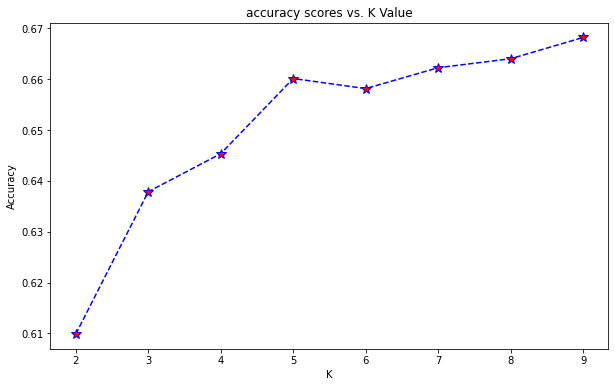

In [42]:
best_K(X_train, y_train, X_test, y_test, r=range(2,10))

The highest accuracy score is obtained when using 9 as k-value.

### 5. You can check also the MLPRegressor for this task!

In [47]:
training_testing_model(models=[MLPRegressor(random_state=1, max_iter=500)])

For model  MLPRegressor(max_iter=500, random_state=1)  the score is  0.49073223045828274


### 6. Check and discuss the results.

Linear regression score = 0,85
KNN regression score = 0,66
MPL Regression score = 0,49


The highest accuracy score is obtained with the linear regression model.

We could improve our models by using different scaling methods. 

Also, we should proceed with scaling techniques after having split the training and test sets.

